In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.figure as fig

In [2]:
with open('pwr.csv', 'r') as file_in:
    read = csv.reader(file_in)
    for line in read:
        print(len(line))
        break

17


In [3]:
a = [[], []]
b = a[0]
a[0].append(1)
print(b)

[1]


In [4]:
sensors = ['Total Power', 'CPU1 Power', 'CPU2 Power', 'PCIE CPU1 Pwr', 'PCIE CPU2 Pwr']
sensors = [[], [], [], [], []]
time_elapsed = [[] for i in sensors]
total_power = sensors[0]
cpu1 = sensors[1]
cpu2 = sensors[2]
pcie1 = sensors[3]
pcie2 = sensors[4]

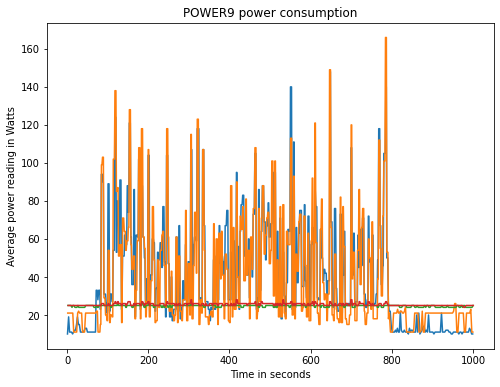

In [5]:
with open('pwr.csv', 'r') as file_in:
    read = csv.reader(file_in)
    for line in read:
        break
    i = 0
    for line in read:
        sensors[i].append(float(line[3]))
        time_elapsed[i].append(float(line[15]))
        i += 1
        if i == 5:
            i = 0

for i in range(1,5):
    plt.plot(time_elapsed[i], sensors[i])
    
plt.title("POWER9 power consumption")
plt.ylabel('Average power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)
#plt.savefig('test.png', dpi=100)
#plt.show()

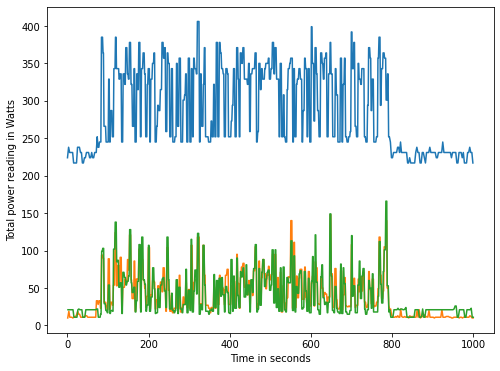

In [6]:
plt.plot(time_elapsed[0], total_power)
plt.plot(time_elapsed[1], cpu1)
plt.plot(time_elapsed[2], cpu2)
plt.ylabel('Total power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

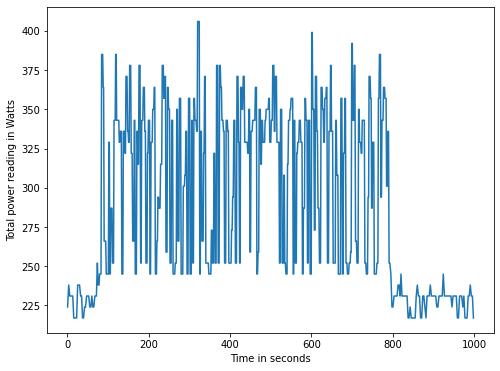

In [7]:
plt.plot(time_elapsed[0], total_power)
plt.ylabel('Total power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

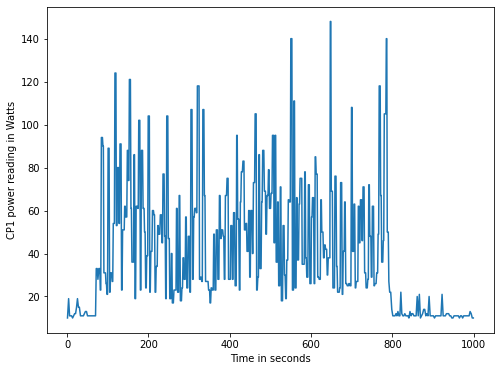

In [8]:
plt.plot(time_elapsed[1], cpu1)
plt.ylabel('CP1 power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

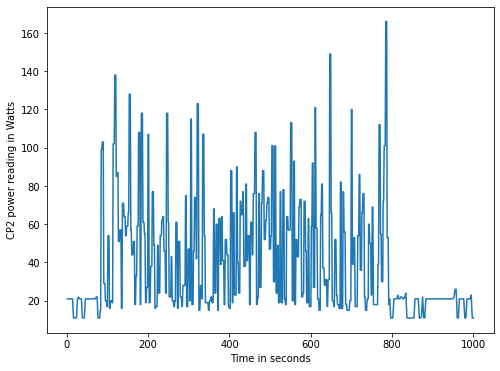

In [9]:
plt.plot(time_elapsed[2], cpu2)
plt.ylabel('CP2 power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

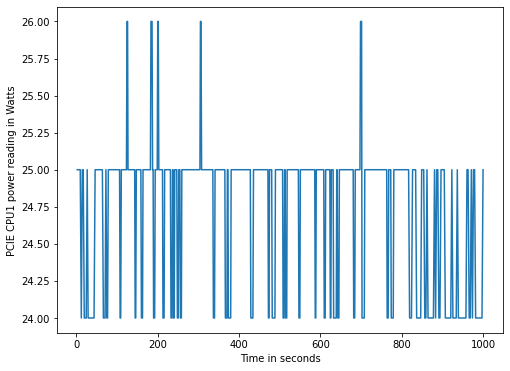

In [10]:
plt.plot(time_elapsed[3], pcie1)
plt.ylabel('PCIE CPU1 power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)

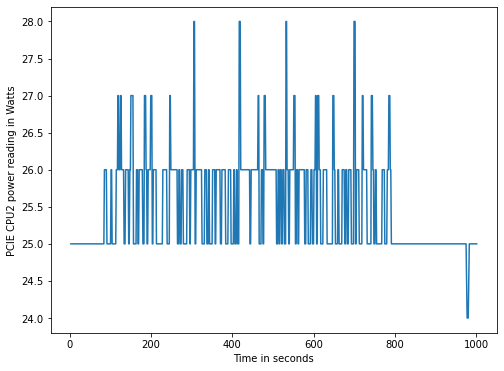

In [11]:
plt.plot(time_elapsed[4], pcie2)
plt.ylabel('PCIE CPU2 power reading in Watts')
plt.xlabel('Time in seconds')
fig = plt.gcf()
fig.set_size_inches(8, 6)